# DON'T EDIT THIS NOTEBOOK
## DOWNLOAD IT AND THEN IMPORT to A NEW ONE

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score 
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [3]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/Test'

In [4]:
IMG_HEIGHT = 60
IMG_WIDTH = 60
NUM_CATEGORIES = len(os.listdir(train_path))

In [5]:
print(NUM_CATEGORIES)

43


In [6]:
classes = { 0:'Speed limit (20km/h)',
 1:'Speed limit (30km/h)',
 2:'Speed limit (50km/h)',
 3:'Speed limit (60km/h)',
 4:'Speed limit (70km/h)',
 5:'Speed limit (80km/h)',
 6:'End of speed limit (80km/h)',
 7:'Speed limit (100km/h)',
 8:'Speed limit (120km/h)',
 9:'No passing',
 10:'No passing veh over 3.5 tons',
 11:'Right-of-way at intersection',
 12:'Priority road',
 13:'Yield',
 14:'Stop',
 15:'No vehicles',
 16:'Veh > 3.5 tons prohibited',
 17:'No entry',
 18:'General caution',
 19:'Dangerous curve left',
 20:'Dangerous curve right',
 21:'Double curve',
 22:'Bumpy road',
 23:'Slippery road',
 24:'Road narrows on the right',
 25:'Road work',
 26:'Traffic signals',
 27:'Pedestrians',
 28:'Children crossing',
 29:'Bicycles crossing',
 30:'Beware of ice/snow',
 31:'Wild animals crossing',
 32:'End speed + passing limits',
 33:'Turn right ahead',
 34:'Turn left ahead',
 35:'Ahead only',
 36:'Go straight or right',
 37:'Go straight or left',
 38:'Keep right',
 39:'Keep left',
 40:'Roundabout mandatory',
 41:'End of no passing',
 42:'End no passing veh > 3.5 tons' }

In [7]:
image_data = []
image_labels = []

In [8]:
for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)
# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 60, 60, 3) (39209,)


In [9]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [10]:
#dividing into validation and training
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3,
random_state=42, shuffle=True)

In [11]:
X_train = X_train/255
X_val = X_val/255

In [12]:
print("X_train", X_train.shape)
print("X_valid", X_val.shape)
print("y_train", y_train.shape)
print("y_valid", y_val.shape)

X_train (27446, 60, 60, 3)
X_valid (11763, 60, 60, 3)
y_train (27446,)
y_valid (11763,)


In [13]:
y_train = keras.utils.to_categorical(y_train,NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

In [14]:
print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [15]:
lr = 0.0003
epochs = 15
#opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
opt = Adam(learning_rate=lr)



In [16]:
def test_acc():
    test = pd.read_csv(data_dir + '/Test.csv')
    labels = test["ClassId"].values
    imgs = test["Path"].values
    data =[]
    for img in imgs:
        try:
            image = cv2.imread(data_dir + '/' +img)
            image_fromarray = Image.fromarray(image,'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            data.append(np.array(resize_image))
        except:
            print("Error in " + img)
            
    X_test = np.array(data)

    X_test = X_test/255
    
    return X_test, labels

In [17]:
# Get pretrained model

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(60,60,3),
                   #pooling='avg',
                   weights='imagenet')

vgg_model_unfreeze_2block = Sequential()
pretrained_model.trainable = True
for layer in pretrained_model.layers[:12]:
    layer.trainable = False
    
        
#for layer in pretrained_model.layers[:-1]: # go through until last layer
    #resnet_model.add(layer)
    

#resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
vgg_model_unfreeze_2block.add(pretrained_model)
#resnet_model.add(tf.keras.layers.BatchNormalization())
vgg_model_unfreeze_2block.add(Flatten())

prediction_layer = tf.keras.layers.Dense(43, activation='softmax')
vgg_model_unfreeze_2block.add(prediction_layer)

#model.compile(optimizer='adam', loss='categorical_crossentropy')
for i, layer in enumerate(pretrained_model.layers):
        print(i, layer.name, "-", layer.trainable)

2022-09-03 15:43:40.279520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 15:43:40.419301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 15:43:40.420250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 15:43:40.422300: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step
0 input_1 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_conv4 - False
11 block3_pool - False
12 block4_conv1 - True
13 block4_conv2 - True
14 block4_conv3 - True
15 block4_conv4 - True
16 block4_pool - True
17 block5_conv1 - True
18 block5_conv2 - True
19 block5_conv3 - True
20 block5_conv4 - True
21 block5_pool - True


In [32]:
aug = ImageDataGenerator(
    horizontal_flip=True,width_shift_range=0.1,
    height_shift_range=0.1,rotation_range=20,featurewise_center=True,
    featurewise_std_normalization=True,shear_range=0.15
    )

In [18]:
lr = 0.0003
epochs = 15
#opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
opt = Adam(learning_rate=lr)


In [19]:
# Compile model
vgg_model_unfreeze_2block.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
len(vgg_model_unfreeze_2block.trainable_variables)

18

In [21]:
history = vgg_model_unfreeze_2block.fit(X_train, y_train,
batch_size=128, epochs=epochs, validation_data=(X_val,
y_val))

2022-09-03 15:44:09.762937: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1185667200 exceeds 10% of free system memory.
2022-09-03 15:44:11.143792: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1185667200 exceeds 10% of free system memory.
2022-09-03 15:44:12.157424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-09-03 15:44:14.073195: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


215/215 [==============================] - ETA: 0s - loss: 1.0590 - accuracy: 0.6711

2022-09-03 15:44:32.525825: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 508161600 exceeds 10% of free system memory.
2022-09-03 15:44:33.136903: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 508161600 exceeds 10% of free system memory.


215/215 [==============================] - 25s 75ms/step - loss: 1.0590 - accuracy: 0.6711 - val_loss: 0.3145 - val_accuracy: 0.8999
Epoch 2/15
215/215 [==============================] - 13s 62ms/step - loss: 0.1714 - accuracy: 0.9439 - val_loss: 0.1001 - val_accuracy: 0.9689
Epoch 3/15
215/215 [==============================] - 13s 61ms/step - loss: 0.1132 - accuracy: 0.9651 - val_loss: 0.0665 - val_accuracy: 0.9811
Epoch 4/15
215/215 [==============================] - 13s 62ms/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.0817 - val_accuracy: 0.9743
Epoch 5/15
215/215 [==============================] - 13s 61ms/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 0.0739 - val_accuracy: 0.9766
Epoch 6/15
215/215 [==============================] - 13s 62ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0712 - val_accuracy: 0.9782
Epoch 7/15
215/215 [==============================] - 13s 62ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0484 - val_accuracy: 0.9839
Epo

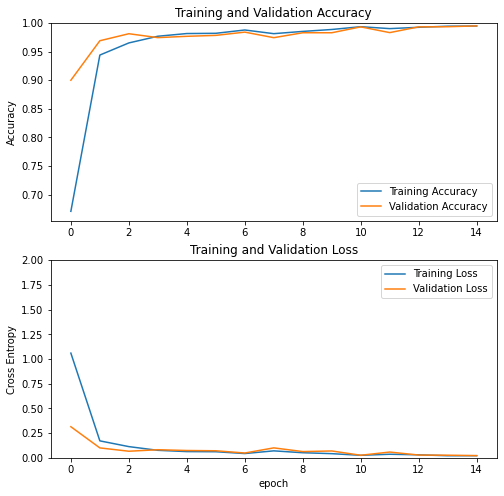

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
X_test, labels = test_acc()

# predict
pred_x = vgg_model_unfreeze_2block.predict(X_test)
pred=np.argmax(pred_x,axis=1)
    #Accuracy with the test data
final_acc = accuracy_score(labels, pred)*100
print(final_acc)

2022-09-03 15:51:06.248665: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 545616000 exceeds 10% of free system memory.


95.81155977830562


In [ ]:
# Check batch of images


#image_batch, label_batch = next(iter(X_train))
#feature_batch = pretrained_model(image_batch)
#print(feature_batch.shape)

In [ ]:
# Check all blocks
for i, layer in enumerate(pretrained_model.layers):
        print(i, layer.name, "-", layer.trainable)

In [ ]:
#pretrained_model.summary()

In [ ]:
# Add classificaiton head 

# Add global avarage pooling (instead of Flatten())
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

# Add Dense layers
dense_layer256 = tf.keras.layers.Dense(256, activation='relu')
dense_layer512 = tf.keras.layers.Dense(512, activation='relu')
dense_layer1028 = tf.keras.layers.Dense(1028, activation='relu')
prediction_layer = tf.keras.layers.Dense(43, activation='softmax')
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [ ]:
# Build model
#inputs = tf.keras.Input(shape=(32, 32, 3))
#pretrained_model = pretrained_model(inputs, training=False)
pretrained_model = pretrained_model[:-2]
resnet_model = Sequential()
#resnet_model.add(tf.keras.Input(shape=(32,32,3)))
resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
resnet_model.add(Flatten())
#resnet_model.add(tf.keras.layers.Dropout(0.2))
resnet_model.add(dense_layer512)
#resnet_model.add(tf.keras.layers.Dropout(0.5))
resnet_model.add(dense_layer256)
resnet_model.add(tf.keras.layers.Dropout(0.5))
#resnet_model.add(tf.keras.layers.Dropout(0.5))
prediction_layer = tf.keras.layers.Dense(43, activation='softmax')
resnet_model.add(prediction_layer)
#model = tf.keras.Model(inputs, outputs)

In [ ]:
resnet_model = tf.keras.Sequential([
        pretrained_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(43, activation='softmax')
    ])

In [ ]:
'''
for i, layer in enumerate(pretrained_model.layers):
        print(i, layer.name, "-", layer.trainable)
        
print('final model')
for i, layer in enumerate(resnet_model.layers):
        print(i, layer.name, "-", layer.trainable)
        '''

In [ ]:
lr = 0.0001
epochs = 10
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))

In [ ]:
'''
aug = ImageDataGenerator(
 rotation_range=10,
 zoom_range=0.15,
 width_shift_range=0.1,
 height_shift_range=0.1,
 shear_range=0.15,
 horizontal_flip=False,
 vertical_flip=False,
 fill_mode="nearest"
 )
'''

In [ ]:
# Compile model
resnet_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.summary()

In [ ]:
history = resnet_model.fit(X_train, y_train,
batch_size=256, epochs=epochs, validation_data=(X_val,
y_val))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def test_acc():
    test = pd.read_csv(data_dir + '/Test.csv')
    labels = test["ClassId"].values
    imgs = test["Path"].values
    data =[]
    for img in imgs:
        try:
            image = cv2.imread(data_dir + '/' +img)
            image_fromarray = Image.fromarray(image,'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            data.append(np.array(resize_image))
        except:
            print("Error in " + img)
            
    X_test = np.array(data)

    X_test = X_test/255
    
    return X_test, labels

In [ ]:
X_test, labels = test_acc()

# predict
pred_x = resnet_model.predict(X_test)
pred=np.argmax(pred_x,axis=1)
    #Accuracy with the test data
final_acc = accuracy_score(labels, pred)*100
print(final_acc)